In [41]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('tested_molecules_with_descriptors.csv')
missing_values = data.isnull().sum()
print('Missing values:', missing_values[missing_values > 0])

molecular_descriptors = data.columns[3:]
scaler = StandardScaler()
data[molecular_descriptors] = scaler.fit_transform(data[molecular_descriptors])

Missing values: Series([], dtype: int64)


In [42]:
data.head()

,SMILES,PKM2_inhibition,ERK2_inhibition,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,C=C(C)c1nc(N)nc(N)n1,0,0,-2.886977,-2.886977,-0.232493,0.763336,-0.622140,-1.013704,-2.735972,...,-0.451672,-0.412137,-0.142314,0.0,-0.196967,-0.217199,0.0,-0.278616,-0.249988,-0.229992
1,C=C(Cl)COc1ccc2c(C)cc(=O)oc2c1,0,0,-0.231561,-0.231561,0.336260,0.445359,0.675637,-0.849048,-1.351495,...,-0.451672,-0.412137,-0.142314,0.0,-0.196967,-0.217199,0.0,-0.278616,-0.249988,-0.229992
2,C=CCNC(=O)CCCC(=O)NCC=C,0,0,-0.298001,-0.298001,-0.620226,0.652183,-0.697156,-1.098920,-1.913645,...,-0.451672,-0.412137,-0.142314,0.0,-0.196967,-0.217199,0.0,-0.278616,-0.249988,-0.229992
3,C=CCOn1c(=O)c(C)[n+]([O-])c2ccccc21,0,0,0.061219,0.061219,-0.473124,0.385970,-1.637454,-0.859517,-1.608083,...,-0.451672,-0.412137,-0.142314,0.0,-0.196967,-0.217199,0.0,-0.278616,-0.249988,-0.229992
4,C=CCn1cc(Cl)c(=O)n(CC=C)c1=O,0,0,-0.027813,-0.027813,-0.823262,0.359600,0.238509,-0.944669,-1.685663,...,-0.451672,-0.412137,-0.142314,0.0,-0.196967,-0.217199,0.0,-0.278616,-0.249988,-0.229992


summary statistics:
        MaxAbsEStateIndex  MaxEStateIndex  MinAbsEStateIndex  MinEStateIndex  \
count       1.116000e+03    1.116000e+03       1.116000e+03    1.116000e+03   
mean       -1.599676e-16   -1.599676e-16       1.591718e-18   -3.442089e-17   
std         1.000448e+00    1.000448e+00       1.000448e+00    1.000448e+00   
min        -3.791372e+00   -3.791372e+00      -8.888375e-01   -3.780280e+00   
25%         4.774172e-02    4.774172e-02      -6.364138e-01   -1.258880e-01   

                qed           SPS         MolWt  HeavyAtomMolWt    ExactMolWt  \
count  1.116000e+03  1.116000e+03  1.116000e+03    1.116000e+03  1.116000e+03   
mean   8.255045e-16 -2.655681e-16  1.539987e-16    5.076087e-17  4.718945e-16   
std    1.000448e+00  1.000448e+00  1.000448e+00    1.000448e+00  1.000448e+00   
min   -2.962427e+00 -1.098920e+00 -2.735972e+00   -2.732022e+00 -2.735087e+00   
25%   -6.952220e-01 -7.346525e-01 -7.302071e-01   -7.328280e-01 -7.299944e-01   

       NumValence

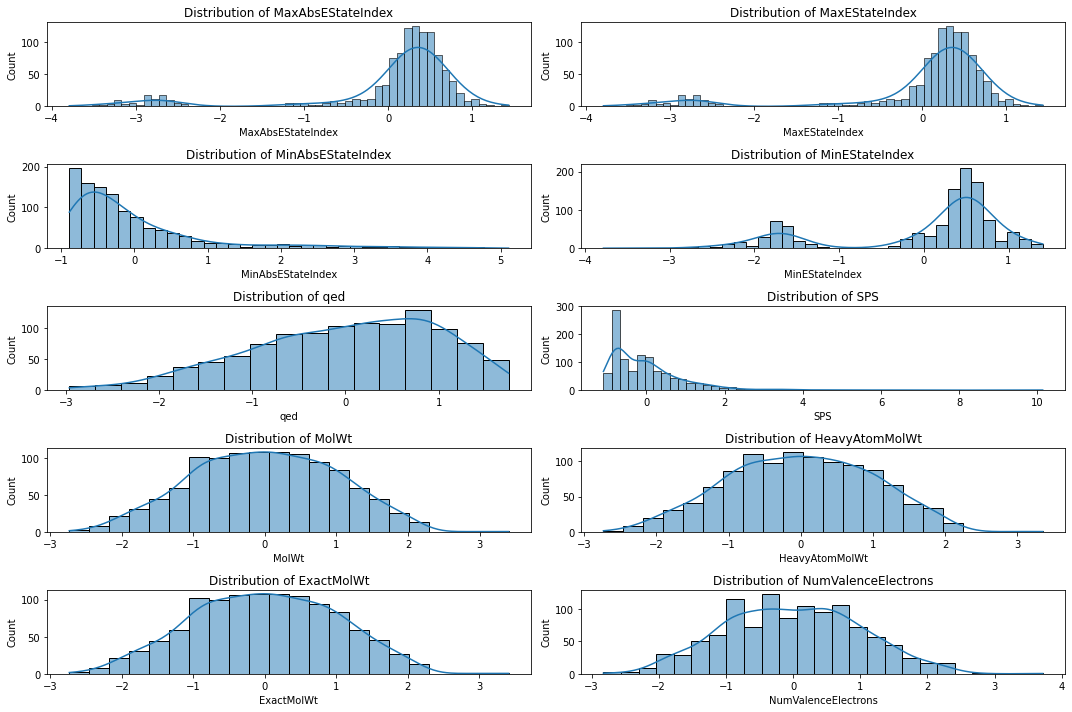

In [43]:
summary_statistics = data[molecular_descriptors].describe()
print('summary statistics:\n', summary_statistics.head())

#show distributions for the first ten molecular descriptors
first10_descriptors = molecular_descriptors[:10]
plt.figure(figsize=(15, 10))
for i, col in enumerate(first10_descriptors, 1):
    plt.subplot(5, 2, i)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

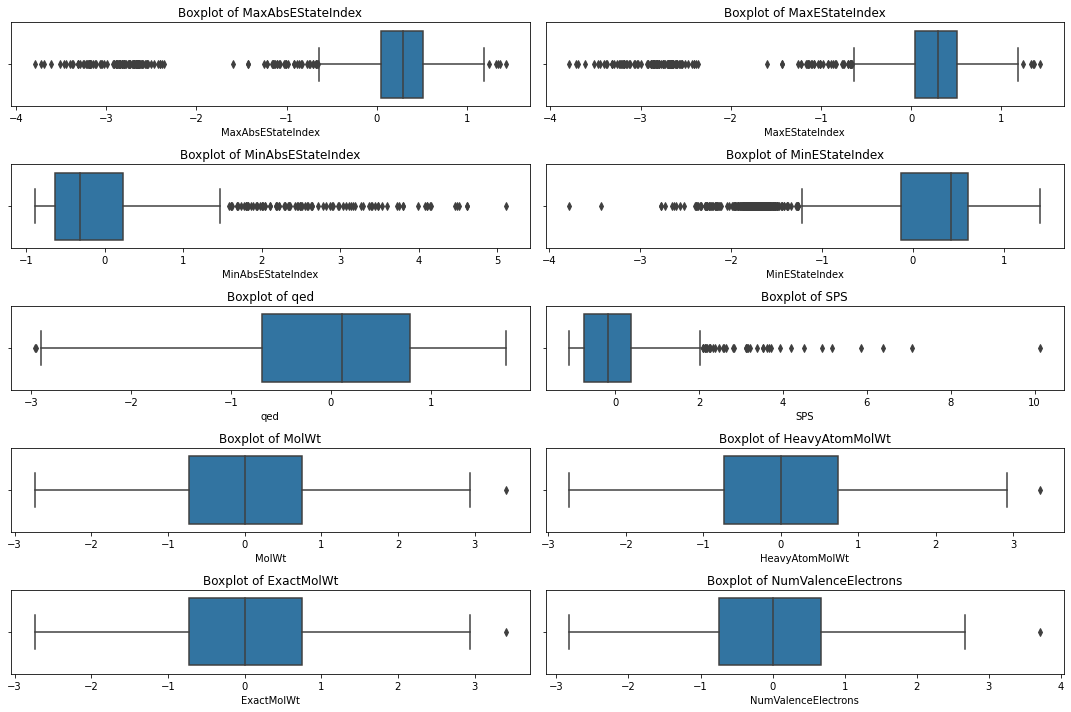

In [44]:
#boxplots for the first ten descriptors
plt.figure(figsize=(15, 10))
for i, col in enumerate(first10_descriptors, 1):
    plt.subplot(5, 2, i)
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

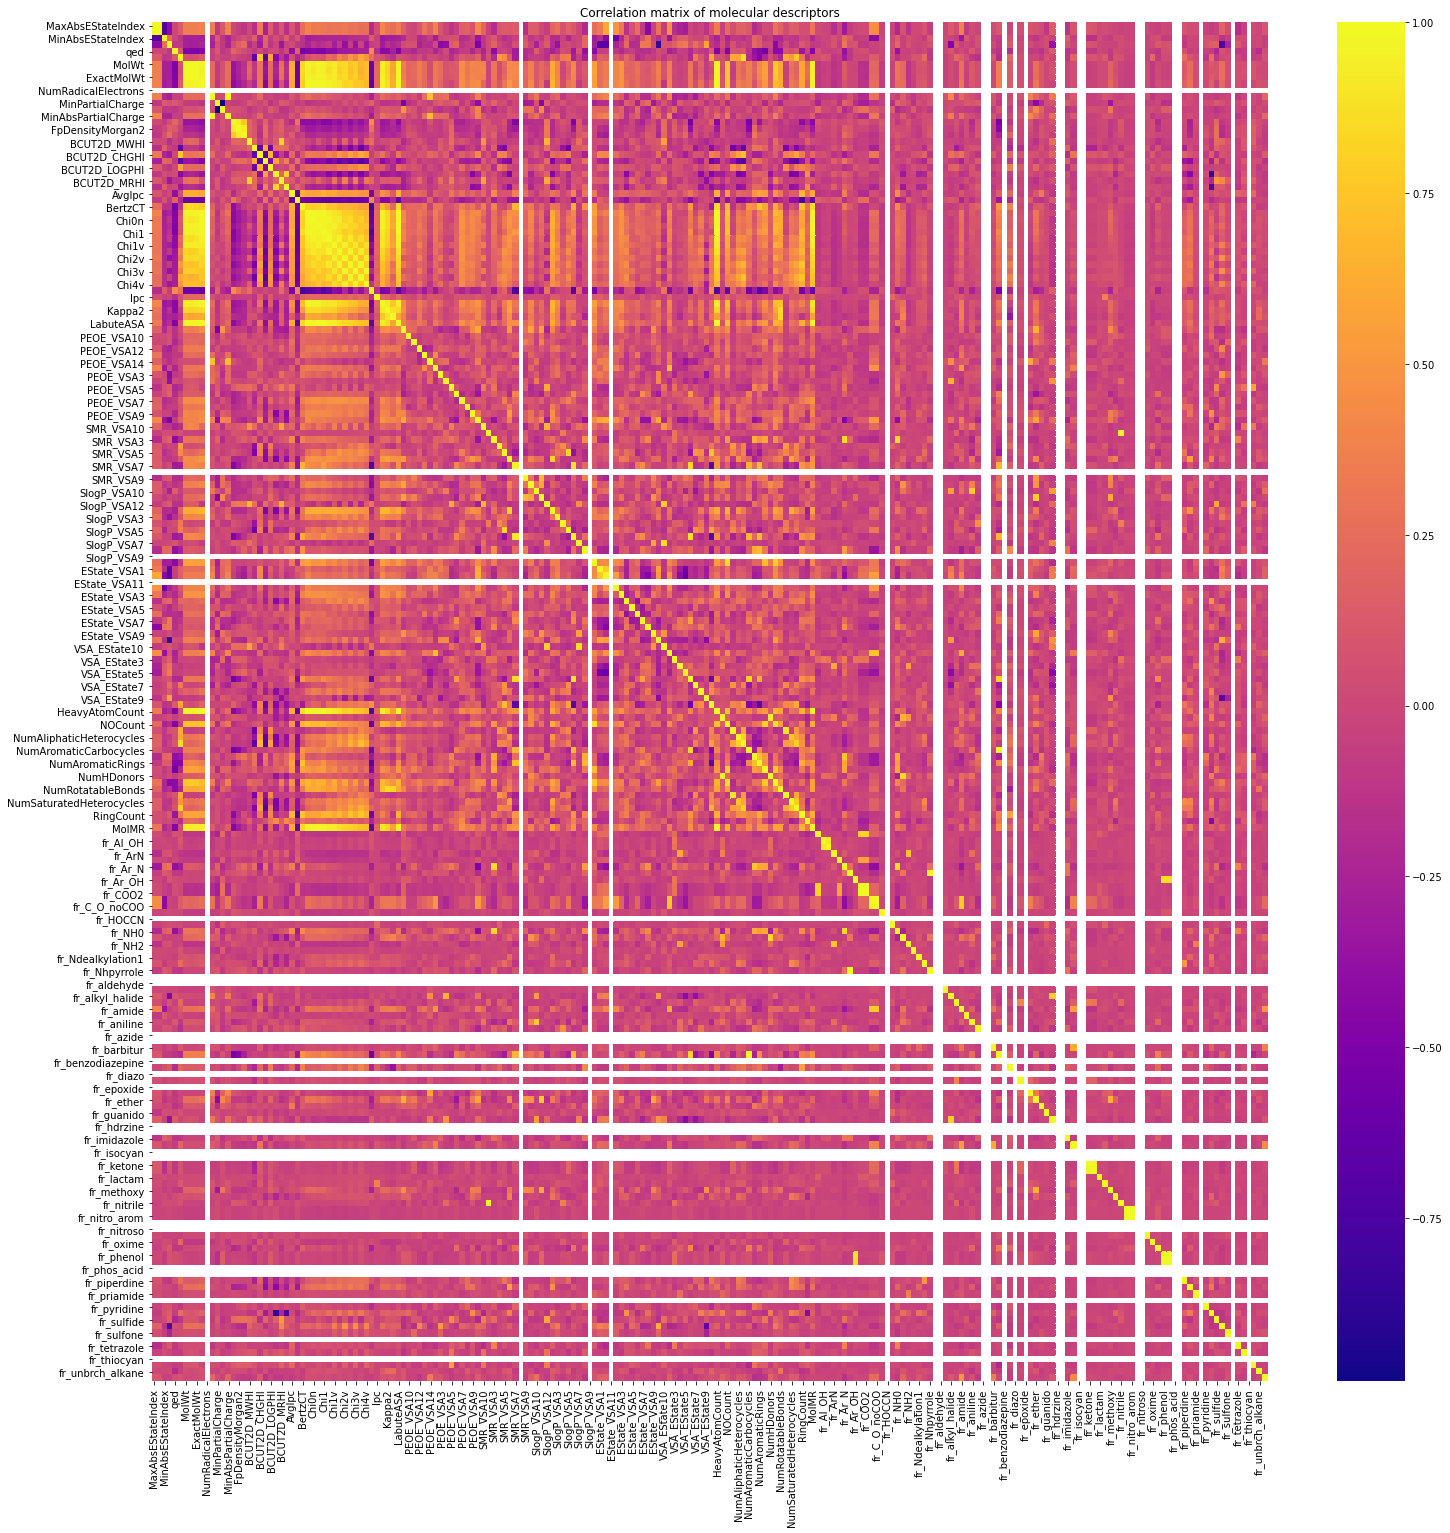

In [45]:
#correlation matrix
correlation_matrix = data[descriptor_columns].corr()
plt.figure(figsize=(25, 25))
sns.heatmap(correlation_matrix, cmap='plasma', center=0)
plt.title('Correlation matrix of molecular descriptors')
plt.show()

In [53]:
#correlation between descriptors and inhibition status
correlations_PKM2 = data[molecular_descriptors].corrwith(data['PKM2_inhibition']).sort_values(ascending=False)
correlations_ERK2 = data[molecular_descriptors].corrwith(data['ERK2_inhibition']).sort_values(ascending=False)

print("Top correlated descriptors for PKM2:\n", correlations_PKM2.head(10))
print("Top correlated descriptors for ERK2:\n", correlations_ERK2.head(10))

Top correlated descriptors for PKM2:
 fr_sulfonamd        0.174816
PEOE_VSA5           0.148083
Chi3v               0.127593
BCUT2D_MRHI         0.125553
AvgIpc              0.122878
fr_thiophene        0.121021
Chi4v               0.115935
BertzCT             0.114193
NumAromaticRings    0.113631
Chi2v               0.112405
dtype: float64
Top correlated descriptors for ERK2:
 fr_nitro_arom       0.136852
fr_nitro            0.136852
MolLogP             0.131815
SMR_VSA9            0.120427
PEOE_VSA4           0.105388
SlogP_VSA8          0.102694
NumAromaticRings    0.096887
SlogP_VSA10         0.095543
RingCount           0.094653
SlogP_VSA6          0.090201
dtype: float64


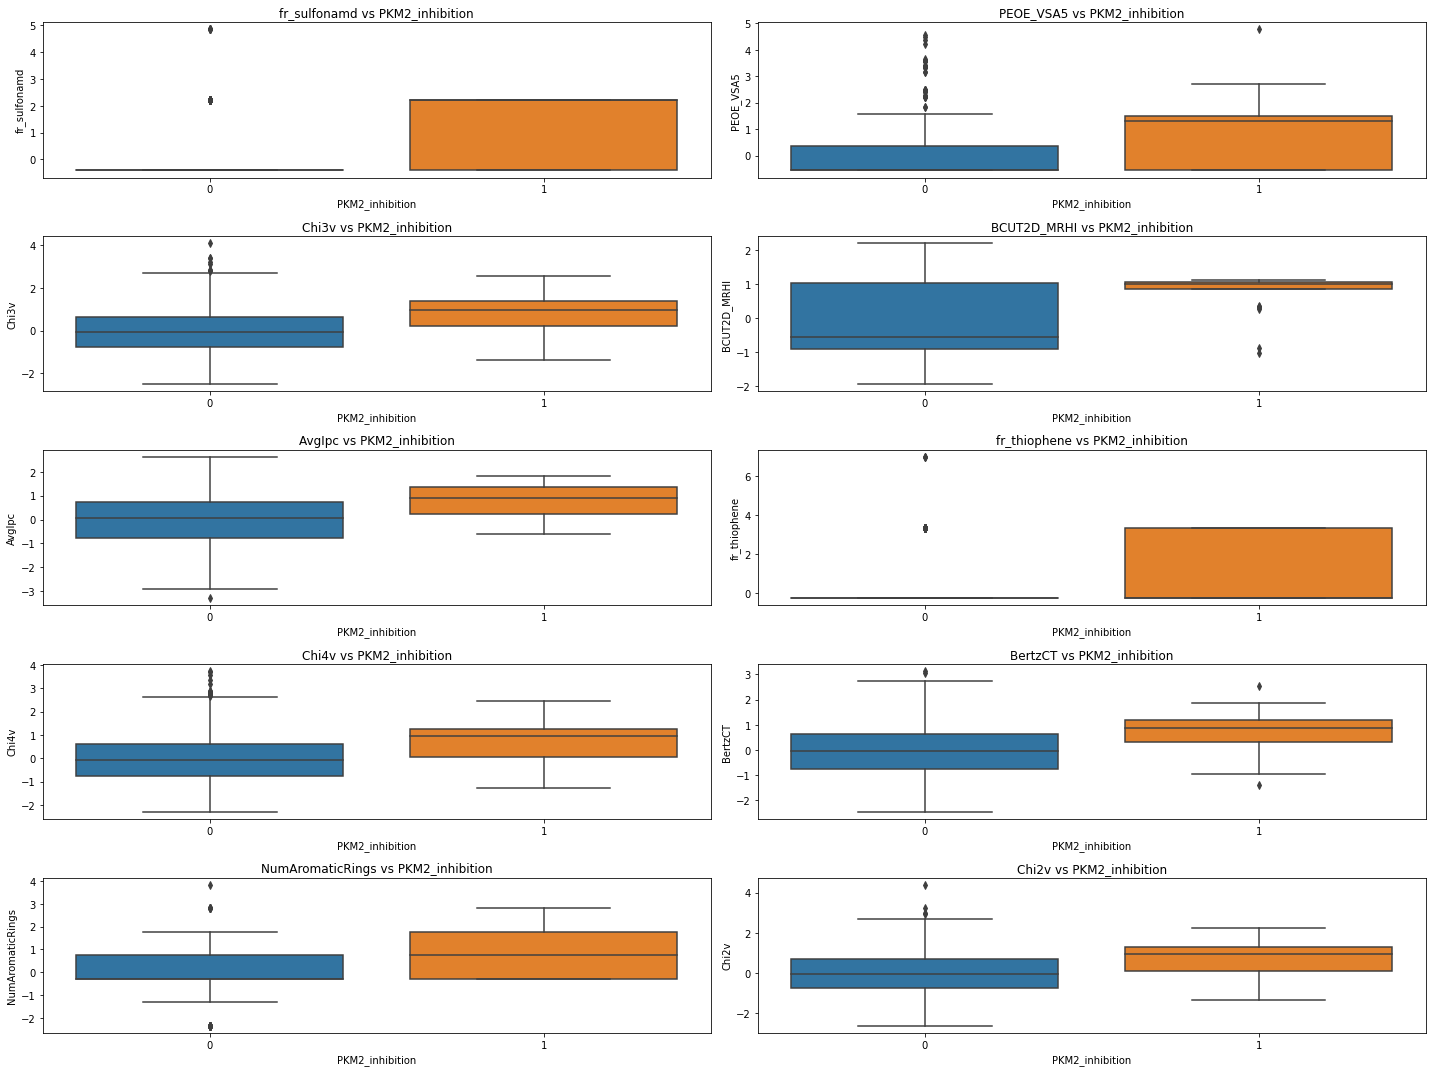

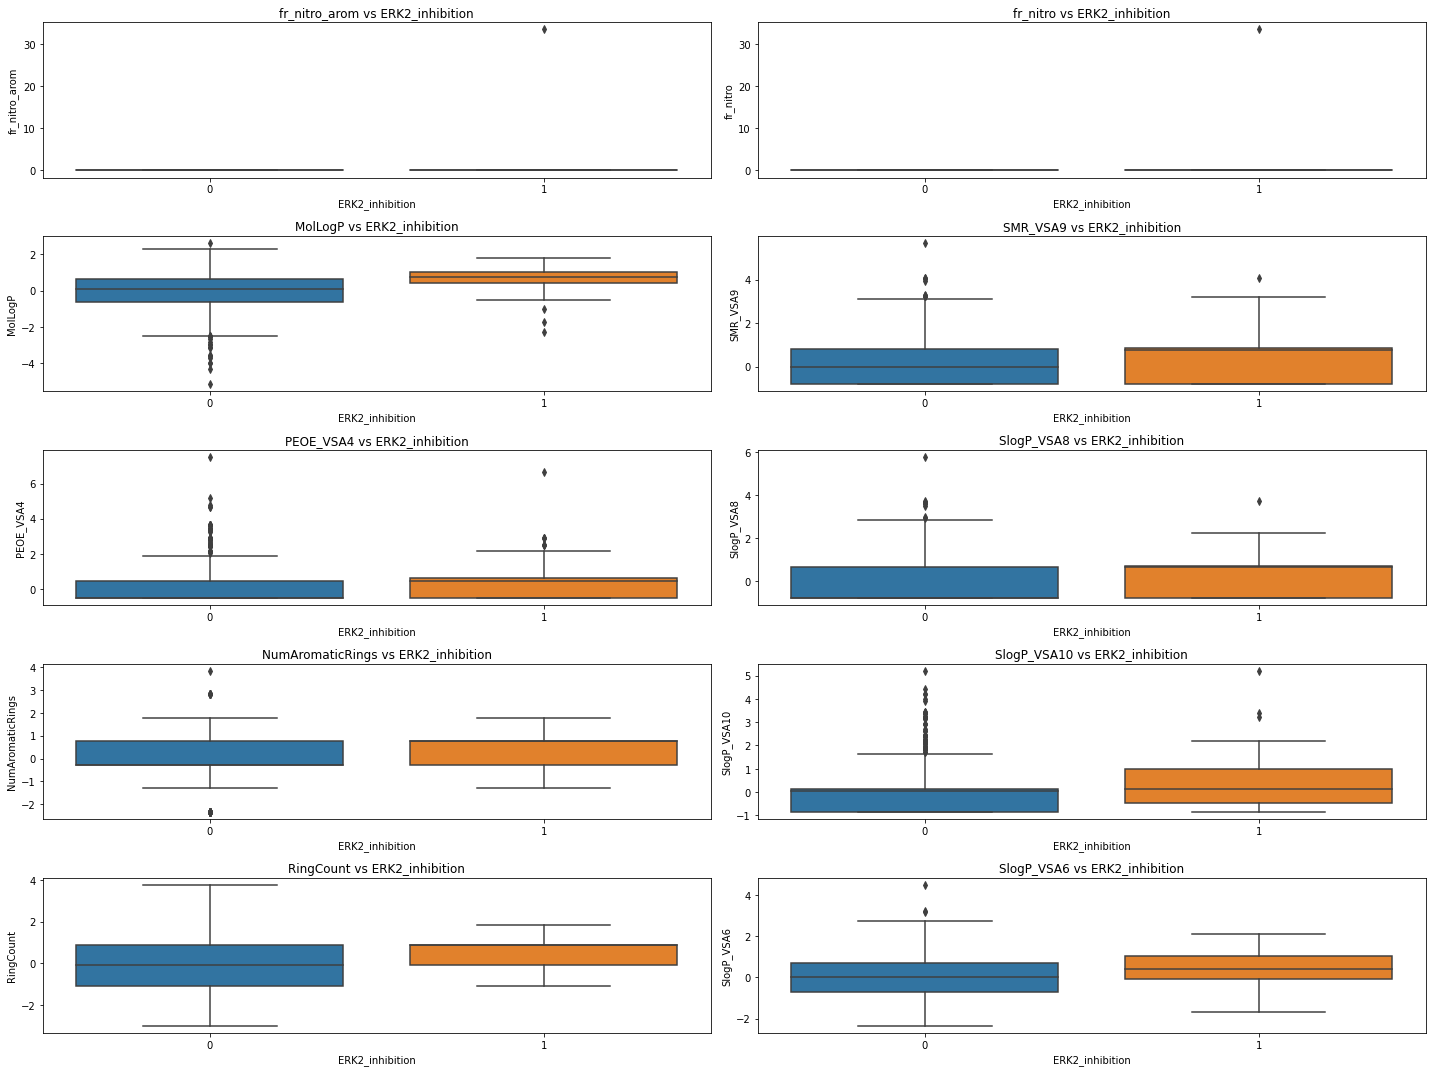

In [55]:
top_descriptors_PKM2 = correlations_PKM2.head(10).index
top_descriptors_ERK2 = correlations_ERK2.head(10).index

#boxplots for top correlated descriptors for PKM2
plt.figure(figsize=(20, 15))
for i, col in enumerate(top_descriptors_PKM2, 1):
    plt.subplot(5, 2, i)
    sns.boxplot(x=data['PKM2_inhibition'], y=data[col])
    plt.title(f'{col} vs PKM2_inhibition')
plt.tight_layout()
plt.show()
#boxplots for top correlated descriptors for ERK2
plt.figure(figsize=(20, 15))
for i, col in enumerate(top_descriptors_ERK2, 1):
    plt.subplot(5, 2, i)
    sns.boxplot(x=data['ERK2_inhibition'], y=data[col])
    plt.title(f'{col} vs ERK2_inhibition')
plt.tight_layout()
plt.show()

#ALSO using Z-scores to detect outliers
#from scipy.stats import zscore
#z_scores = np.abs(zscore(data[descriptor_columns]))
#threshold = 3 #idk can be changed
#outliers = np.where(z_scores > threshold)
#print("Outliers detected at positions:\n", outliers)


In [58]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier

#feature matrix (x) and target vectors (y_PKM2 and y_ERK2)
X = data[molecular_descriptors]
y_PKM2 = data['PKM2_inhibition']
y_ERK2 = data['ERK2_inhibition']

#Mutual Information measures the dependency between a feature and target variable
#calculate MI for PKM2
MI_PKM2 = mutual_info_classif(X, y_PKM2, random_state=0)
MI_PKM2_series = pd.Series(MI_PKM2, index=molecular_descriptors).sort_values(ascending=False)
#MI for ERK2
MI_ERK2 = mutual_info_classif(X, y_ERK2, random_state=0)
MI_ERK2_series = pd.Series(MI_ERK2, index=molecular_descriptors).sort_values(ascending=False)

#Random Forest makes decision trees and thus feature importance scores
#RF for PKM2
RF_PKM2 = RandomForestClassifier(random_state=0)
RF_PKM2.fit(X, y_PKM2)
RF_PKM2_importances = pd.Series(RF_PKM2.feature_importances_, index=molecular_descriptors).sort_values(ascending=False)
#RF for ERK2
RF_ERK2 = RandomForestClassifier(random_state=0)
RF_ERK2.fit(X, y_ERK2)
RF_ERK2_importances = pd.Series(RF_ERK2.feature_importances_, index=molecular_descriptors).sort_values(ascending=False)

combined_PKM2 = pd.DataFrame({
    'Mutual Information': MI_PKM2_series,
    'Random Forest Importance': RF_PKM2_importances
}).sort_values(by='Mutual Information', ascending=False).head(10)

combined_ERK2 = pd.DataFrame({
    'Mutual Information': MI_ERK2_series,
    'Random Forest Importance': RF_ERK2_importances
}).sort_values(by='Mutual Information', ascending=False).head(10)

print("Combined descriptor selection for PKM2:\n", combined_PKM2)
print("Combined descriptor selection for ERK2:\n", combined_ERK2)

Combined descriptor selection for PKM2:
                      Mutual Information  Random Forest Importance
BCUT2D_MRHI                    0.022429                  0.012091
MinEStateIndex                 0.019813                  0.015188
BCUT2D_MWHI                    0.019651                  0.008767
SMR_VSA10                      0.019470                  0.009122
PEOE_VSA3                      0.018886                  0.010660
MinAbsPartialCharge            0.016420                  0.008458
MaxPartialCharge               0.016203                  0.004547
NHOHCount                      0.015399                  0.001679
SlogP_VSA6                     0.014442                  0.007907
EState_VSA5                    0.014284                  0.011057
Combined descriptor selection for ERK2:
              Mutual Information  Random Forest Importance
SlogP_VSA8             0.021077                  0.009378
fr_C_O                 0.020335                  0.001728
MolLogP           

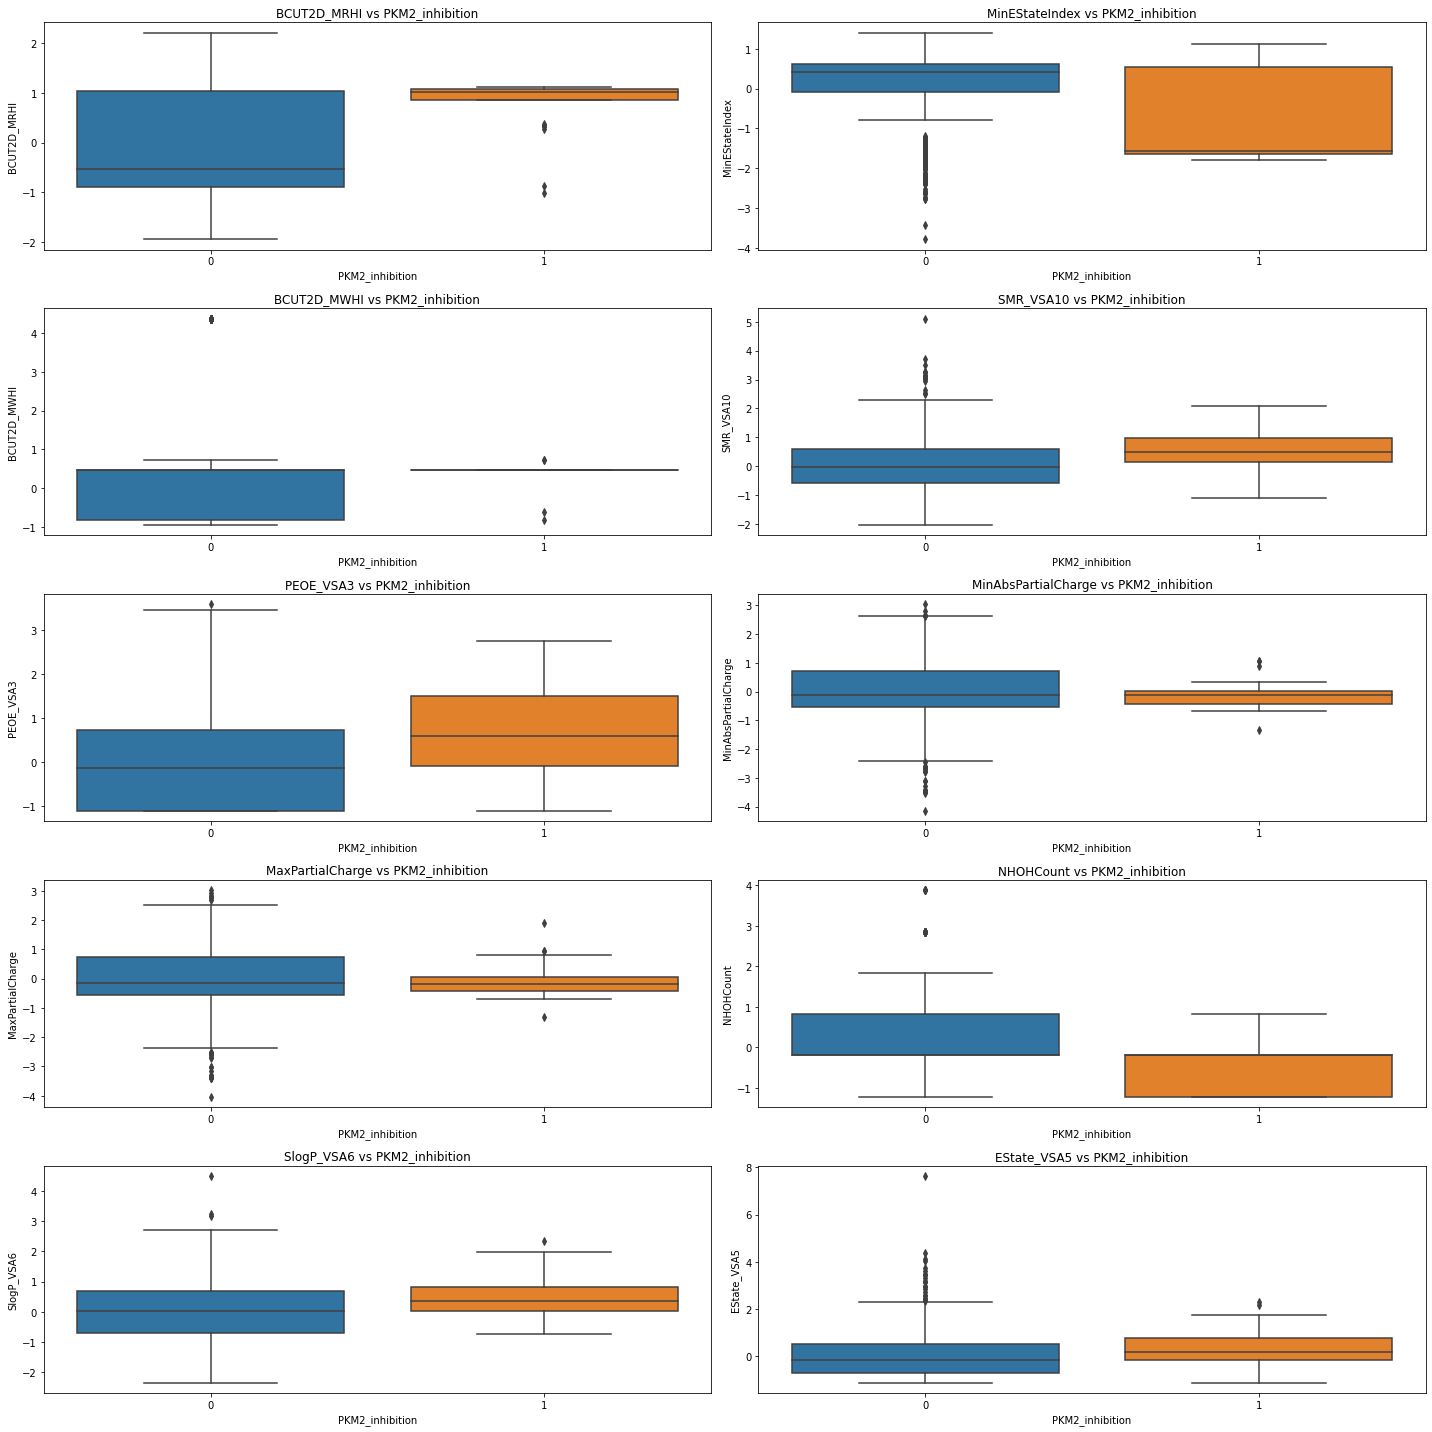

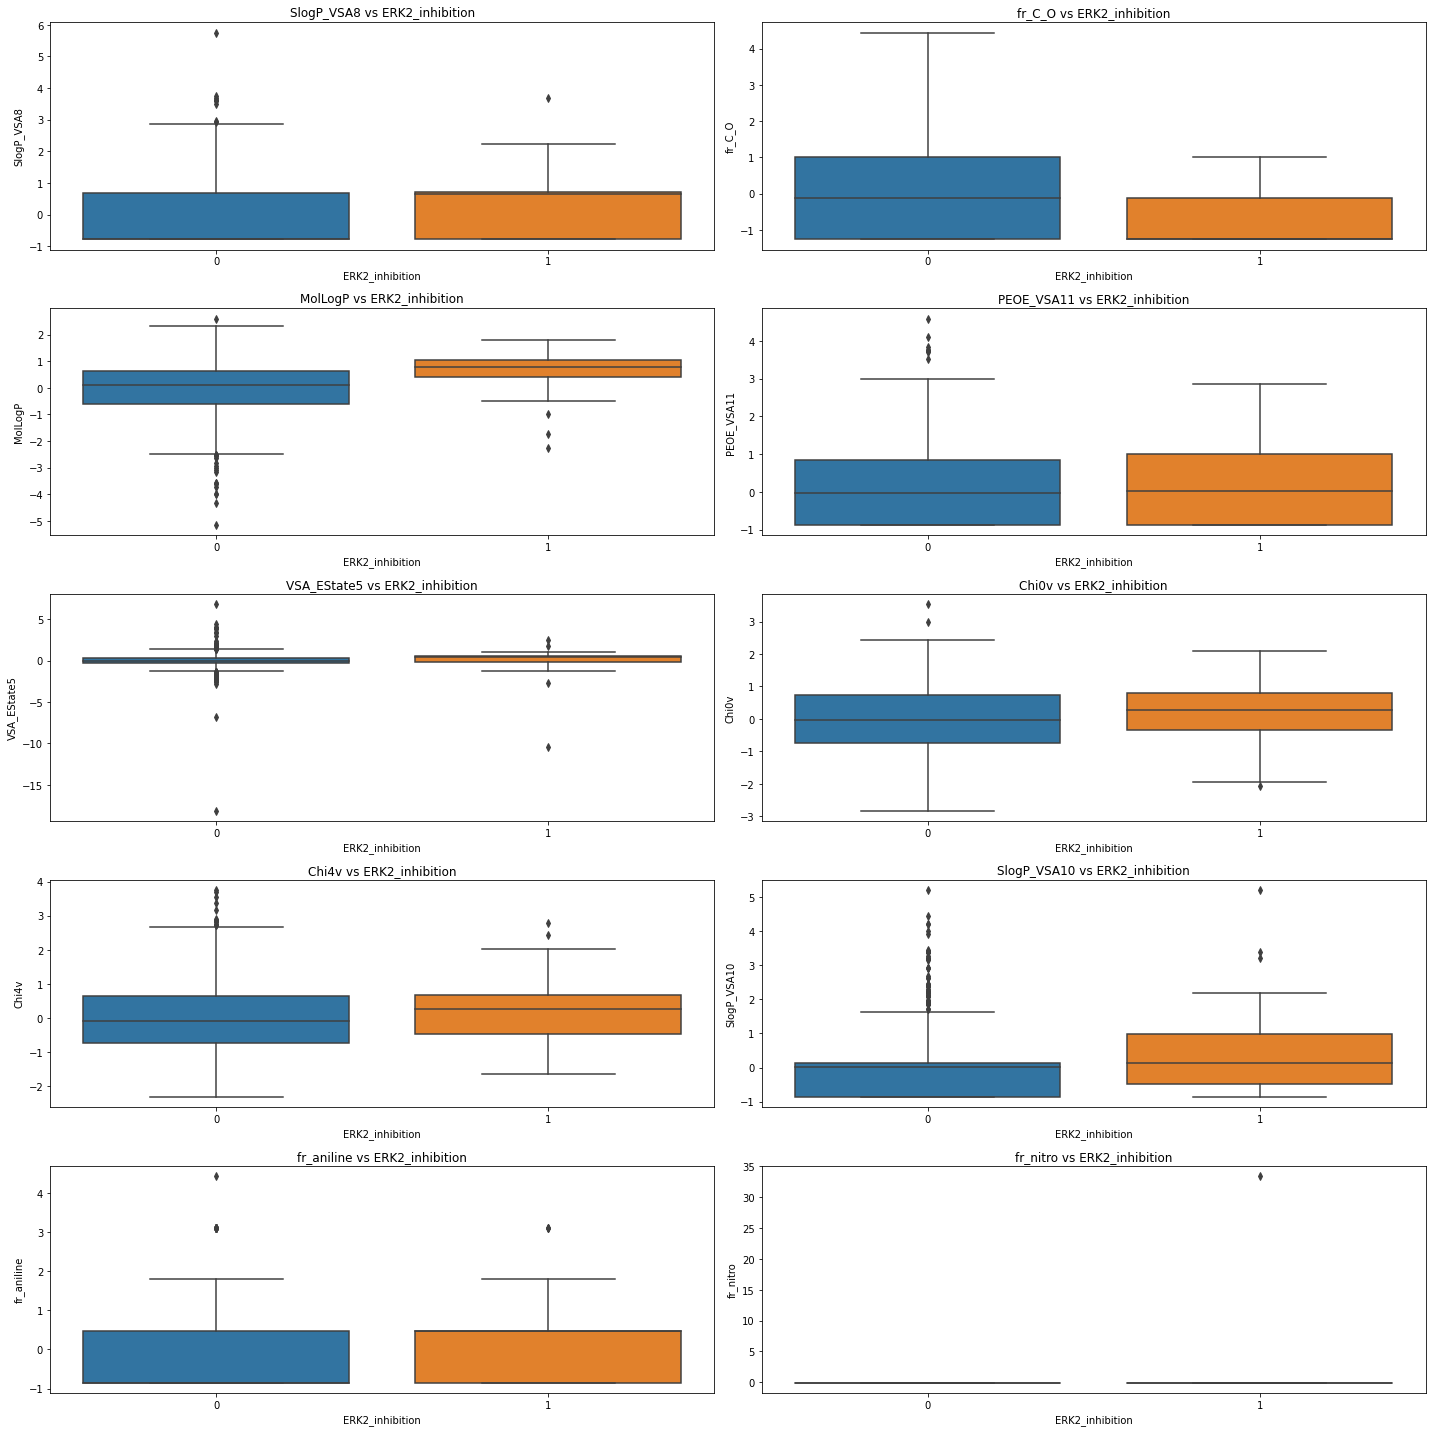

In [65]:
combined_descriptors_PKM2 = combined_PKM2.index
combined_descriptors_ERK2 = combined_ERK2.index

#boxplots for top combined descriptors for PKM2
plt.figure(figsize=(20, 20))
for i, col in enumerate(combined_descriptors_PKM2, 1):
    plt.subplot(5, 2, i)
    sns.boxplot(x=data['PKM2_inhibition'], y=data[col])
    plt.title(f'{col} vs PKM2_inhibition')
plt.tight_layout()
plt.show()
#boxplots for top combined descriptors for ERK2
plt.figure(figsize=(20, 20))
for i, col in enumerate(combined_descriptors_ERK2, 1):
    plt.subplot(5, 2, i)
    sns.boxplot(x=data['ERK2_inhibition'], y=data[col])
    plt.title(f'{col} vs ERK2_inhibition')
plt.tight_layout()
plt.show()
